In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("C:\\Users\\jipso\\OneDrive\\Desktop\\CSV Files for Jupyter\\train_data.csv")
# test_data = pd.read_csv("C:\\Users\\jipso\\OneDrive\\Desktop\\CSV Files for Jupyter\\test_data.csv")

In [3]:
df_train = train_data.copy()

In [4]:
df_train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
df_train.shape

(19104, 13)

In [6]:
# df_train.drop_duplicates(subset = "Emp_ID", keep = False, inplace = True)

# df_train.head()

In [7]:
df_train.shape

(19104, 13)

In [8]:
# checking duplicate values
# df_train[df_train.duplicated()] will bring in every columns with duplicate values

df_train.duplicated().sum()

0

In [9]:
# Dropping duplicate rows
# df_train.drop_duplicates(keep='first'). This will keep the first duplicated one and delete the other ones.
# If don't use "keep='first'" it will still work. 

In [10]:
df_train.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


Data Preprocessing

In [11]:
df_train.isnull().sum() #or isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
df_train.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [13]:
df_train.drop(['Joining Designation'],axis=1,inplace=True)
df_train.drop(['Designation'],axis=1,inplace=True)
df_train.drop(['MMM-YY'],axis=1,inplace=True)
df_train.drop(['Dateofjoining'],axis=1,inplace=True)
df_train.drop(['Total Business Value'],axis=1,inplace=True)

In [14]:
# df_train[''].unique() Checking unique values in each column

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Emp_ID            19104 non-null  int64 
 1   Age               19104 non-null  int64 
 2   Gender            19104 non-null  object
 3   City              19104 non-null  object
 4   Education_Level   19104 non-null  object
 5   Salary            19104 non-null  int64 
 6   LastWorkingDate   1616 non-null   object
 7   Quarterly Rating  19104 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.2+ MB


In [16]:
df_train.shape

(19104, 8)

LastWorkingDate is my target variable. Changing the values. 

In [17]:
# df_train.loc[df_train.isnull()] = 1 # not null            # for the entire data
# df_train.loc[df_train.isnull()] = 0  # null

In [18]:
df_train["LastWorkingDate"] = df_train["LastWorkingDate"].fillna(0) #filled all the Null values with 0

In [19]:
df_train["LastWorkingDate"] = np.where(df_train["LastWorkingDate"] == 0, df_train["LastWorkingDate"], 1) #replaced all the non zero values with 1

In [20]:
df_train["LastWorkingDate"].unique()

array([0, 1], dtype=object)

In [21]:
df_train["LastWorkingDate"] = df_train["LastWorkingDate"].astype(int)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Emp_ID            19104 non-null  int64 
 1   Age               19104 non-null  int64 
 2   Gender            19104 non-null  object
 3   City              19104 non-null  object
 4   Education_Level   19104 non-null  object
 5   Salary            19104 non-null  int64 
 6   LastWorkingDate   19104 non-null  int32 
 7   Quarterly Rating  19104 non-null  int64 
dtypes: int32(1), int64(4), object(3)
memory usage: 1.1+ MB


In [23]:
df_train.shape

(19104, 8)

In [24]:
df_train = pd.get_dummies(df_train)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Emp_ID                    19104 non-null  int64
 1   Age                       19104 non-null  int64
 2   Salary                    19104 non-null  int64
 3   LastWorkingDate           19104 non-null  int32
 4   Quarterly Rating          19104 non-null  int64
 5   Gender_Female             19104 non-null  uint8
 6   Gender_Male               19104 non-null  uint8
 7   City_C1                   19104 non-null  uint8
 8   City_C10                  19104 non-null  uint8
 9   City_C11                  19104 non-null  uint8
 10  City_C12                  19104 non-null  uint8
 11  City_C13                  19104 non-null  uint8
 12  City_C14                  19104 non-null  uint8
 13  City_C15                  19104 non-null  uint8
 14  City_C16                  19104 non-nu

Correlation

Positive correlation: relationship of variable is moving in the same direction. Both are increasing or decreasing. 

Negative Correlation: relationship moving in inverse direction. One variable is increasing while the other is decreasing. 

No correlation

<AxesSubplot:>

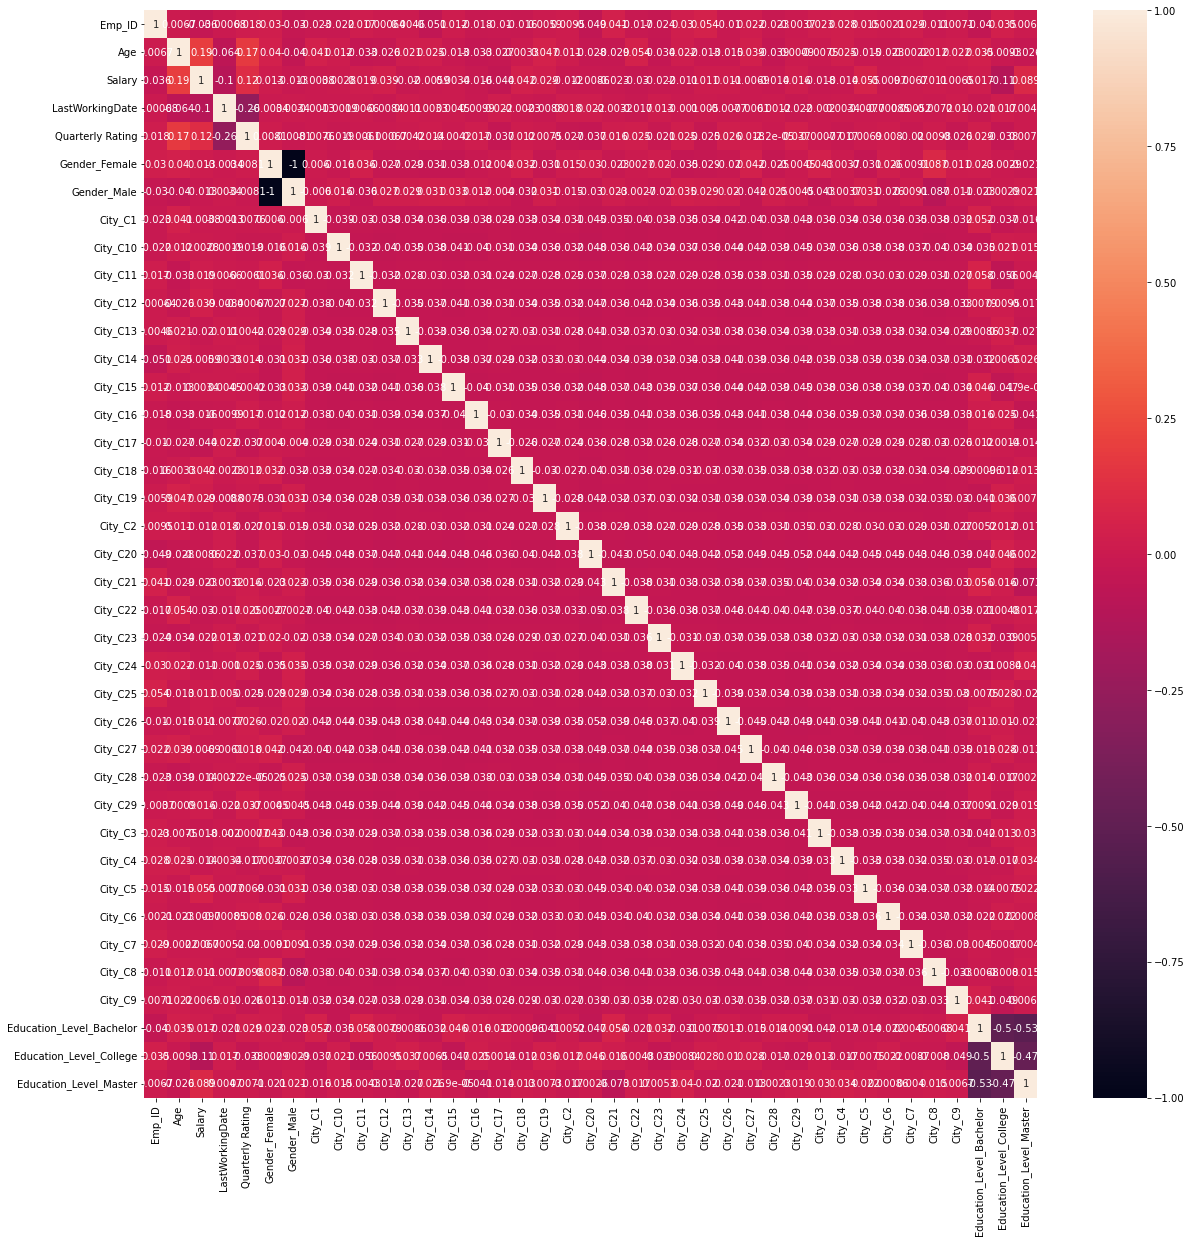

In [26]:
corr = df_train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True)

In [27]:
x = df_train.drop(['LastWorkingDate'], axis=1)
y = df_train['LastWorkingDate']

In [28]:
x

,Emp_ID,Age,Salary,Quarterly Rating,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,1,28,57387,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,28,57387,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,28,57387,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,31,67016,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2,31,67016,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30,70254,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19100,2788,30,70254,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19101,2788,30,70254,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19102,2788,30,70254,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
y

0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: LastWorkingDate, Length: 19104, dtype: int32

PCA implementation

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)

PCA()

In [31]:
print(pca.components_.shape)

(38, 38)


In [32]:
# Choosing the Number of Principal Components

principal_components = pca.fit_transform(x)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(19104, 38)


<AxesSubplot:>

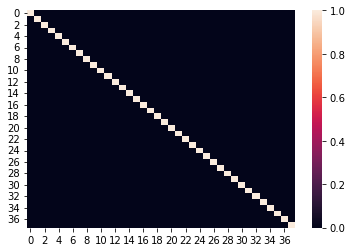

In [33]:
sns.heatmap(principal_components_df.corr())

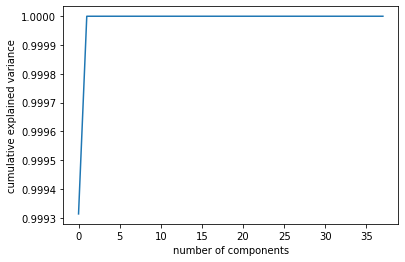

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [35]:
# PCA for Dimensionality Reduction

pca_low_dim = PCA(n_components = 5)

pca_low_dim.fit_transform(x)

array([[-8.26369400e+03,  1.42234872e+03, -6.18247227e+00,
         2.18912260e-01, -5.66477563e-01],
       [-8.26369400e+03,  1.42234872e+03, -6.18247227e+00,
         2.18912260e-01, -5.66477563e-01],
       [-8.26369400e+03,  1.42234872e+03, -6.18247227e+00,
         2.18912260e-01, -5.66477563e-01],
       ...,
       [ 4.60068452e+03, -1.37672715e+03, -4.97826857e+00,
         6.78712154e-02, -6.37110241e-01],
       [ 4.60068452e+03, -1.37672715e+03, -4.97826857e+00,
         6.78712154e-02, -6.37110241e-01],
       [ 4.60068452e+03, -1.37672715e+03, -4.97826857e+00,
         6.78712154e-02, -6.37110241e-01]])

In [36]:
type(pca_low_dim)

sklearn.decomposition._pca.PCA

In [37]:
y.value_counts()

0    17488
1     1616
Name: LastWorkingDate, dtype: int64

In [38]:
# Target values are not balanced, so running SMOTE

from sklearn.model_selection import train_test_split    #importing Sklearn packages's data splitting function
from sklearn import metrics
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 10)

In [39]:
pip install imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_train,y_train = sm.fit_resample(x_train,y_train)
x_test,y_test = sm.fit_resample(x_test,y_test)
y_train.value_counts()

0    13971
1    13971
Name: LastWorkingDate, dtype: int64

In [41]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators = 10, max_samples = .8, bootstrap = True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score = bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test, test_pred))
print(metrics.classification_report(y_test,test_pred))

The Bagging classifier model accuracy is 0.8967870344043218
The confusion matrix of Bagging classifier model is
[[3365  152]
 [ 574 2943]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3517
           1       0.95      0.84      0.89      3517

    accuracy                           0.90      7034
   macro avg       0.90      0.90      0.90      7034
weighted avg       0.90      0.90      0.90      7034



In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

xgb_cl = XGBClassifier()

xgb_cl.fit(x_train, y_train)
y_pred = xgb_cl.predict(x_test)

xgb_score = accuracy_score(y_test, y_pred)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print("Accuracy of model is : ",accuracy_score(y_test,y_pred))

[[3446   71]
 [ 360 3157]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3517
           1       0.98      0.90      0.94      3517

    accuracy                           0.94      7034
   macro avg       0.94      0.94      0.94      7034
weighted avg       0.94      0.94      0.94      7034

Accuracy of model is :  0.938726187091271


In [44]:
#Using Decision Tree Classifier for model building by "gini"

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="gini")
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [45]:
# Predict Species for test data

pred = clf.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
print("The accuracy of the Decision Tree is {}%".format(round(accuracy_score(pred,y_test)*100,2)))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test,pred))

The accuracy of the Decision Tree is 81.8%
[[2524  993]
 [ 287 3230]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      3517
           1       0.76      0.92      0.83      3517

    accuracy                           0.82      7034
   macro avg       0.83      0.82      0.82      7034
weighted avg       0.83      0.82      0.82      7034

